In [1]:
import random, os, tqdm, time, json, re
import numpy as np
import pandas as pd
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
from datetime import datetime

import sys
sys.path.append("../../../")

random.seed(618)
np.random.seed(907)

new_base_path = os.path.join(
    "/Users/minkexiu/Downloads/",
    "/".join(
        os.getcwd().split("/")[-1*(len(sys.path[-1].split("/")) - 1):]
    ),
)
print("storage dir:", new_base_path)
print("code dir:", os.getcwd())

## 创建文件夹。
if not os.path.exists(new_base_path):
    os.makedirs(
        new_base_path
    )
if not os.path.exists(os.path.join(new_base_path, "preprocessedData")):
    os.makedirs(
        os.path.join(new_base_path, "preprocessedData")
    )
if not os.path.exists(os.path.join(new_base_path, "originalData")):
    os.makedirs(
        os.path.join(new_base_path, "originalData")
    )
if not os.path.exists(os.path.join(new_base_path, "trained_models")):
    os.makedirs(
        os.path.join(new_base_path, "trained_models")
    )

def create_originalData_path(filename_or_path):
    return os.path.join(new_base_path, "originalData", filename_or_path)
def create_preprocessedData_path(filename_or_path):
    return os.path.join(new_base_path, "preprocessedData", filename_or_path)
def create_trained_models_path(filename_or_path):
    return os.path.join(new_base_path, "trained_models", filename_or_path)

def millisec2datetime(timestamp):
    time_local = time.localtime(timestamp/1000)
    return time.strftime("%Y-%m-%d %H:%M:%S", time_local)
    
def run_finish():
    # 假设你的字体文件是 'myfont.ttf' 并且位于当前目录下  
    font = FontProperties(fname="/Users/minkexiu/Documents/GitHub/ML_Tryout/SimHei.ttf", size=24)  
    # 创建一个空白的图形  
    fig, ax = plt.subplots()  
    ax.imshow(
        plt.imread("/Users/minkexiu/Downloads/wallhaven-dgxpyg.jpg")
    )
    # 在图形中添加文字  
    ax.text(
        ax.get_xlim()[1] * 0.5, 
        ax.get_ylim()[0] * 0.5, 
        f"程序于这个点跑完：\n{millisec2datetime(time.time()*1000)}", fontproperties=font, ha="center", va="center", color="red"
    )  
    # 设置图形的布局  
    # ax.set_xlim(0, 1)  
    # ax.set_ylim(0, 1)  
    ax.set_xticks([])  
    ax.set_yticks([])  
    ax.patch.set_color("blue")
    # 显示图形  
    plt.show()
        
tqdm.tqdm.pandas() ## 引入这个，就可以在apply的时候用progress_apply了。

import IPython
def kill_current_kernel():
    '''杀死当前的kernel释放内存空间。'''
    IPython.Application.instance().kernel.do_shutdown(True) 
    
def simply_show_data(df1):
    print(df1.shape)
    display(df1.head())
    
def wait_flag(saved_flag_path, time_interval_sec=10):
    print("waiting for", saved_flag_path)
    time_count = 0
    while True:
        if os.path.exists(saved_flag_path):
            break
        time.sleep(time_interval_sec)
        time_count+=time_interval_sec
        print(time_count, end=" ")
    print("finish!!")

def parallelly_run_multiple_similar_python_code(codes, nb_workers = 4):
    '''
    codes是多条相似的python代码。
    这个函数的作用就是将其平行地跑，每一条python代码就对应一个线程。或许可以后续优化，比如固定线程数为一个特定值。
    nb_workers 如果赋值为
    '''
    assert (isinstance(nb_workers, int)), "`nb_workers' should be int."
    df_sqls = pd.DataFrame(
        {
            "func": codes

        }
    )
    display(df_sqls)
    from pandarallel import pandarallel
    pandarallel.initialize(nb_workers = df_sqls.shape[0] if nb_workers<0 else nb_workers, progress_bar = True)
    def run_sql_prlly(row):
        try: 
            cmd = f'{row["func"]}'
            print(cmd, "\n")
            eval(cmd)
            return "0-success"
        except Exception as e:
            return e
    df_sqls["run_rsts"] = df_sqls.parallel_apply(lambda row: run_sql_prlly(row), axis = 1)
    display(df_sqls)
    
def create_originalData_path(filename_or_path):
    return os.path.join(new_base_path, "originalData", filename_or_path)
def create_preprocessedData_path(filename_or_path):
    return os.path.join(new_base_path, "preprocessedData", filename_or_path)
def create_trained_models_path(filename_or_path):
    return os.path.join(new_base_path, "trained_models", filename_or_path)
    
class TimerContext:  
    def __enter__(self):  
        self.start_time = str(datetime.now())
        print("start time:", self.start_time)
        return self  
    def __exit__(self, exc_type, exc_val, exc_tb):  
        print("start time:", self.start_time)
        print("end time", str(datetime.now()))

def three_num_get_gua(a, b, c):
    '''梅花易数三数起卦，以取本、互、变。'''
    bagua = ["111", "110", "101", "100", "011", "010", "001", "000"]
    guatu = {
        "111": ("☰", "天", "乾金"), 
        "110": ("☱", "泽", "兑金"),
        "101": ("☲", "火", "离火"),
        "100": ("☳" , "雷", "震木"),
        "011": ("☴", "风", "巽木"),
        "010": ("☵", "水", "坎水"),
        "001": ("☶", "山", "艮土"),
        "000": ("☷", "地", "坤土"),
    }
    shanggua_idx = 7 if (a % 8 == 0) else (a % 8 - 1)
    xiagua_idx = 7 if (b % 8 == 0) else (b % 8 - 1)
    bianyao_idx = 5 if (c % 6 == 0) else (c % 6 - 1)
    bengua = bagua[xiagua_idx] + bagua[shanggua_idx]
    hugua = bengua[1:-1][:3] + bengua[1:-1][1:]
    biangua = list(bengua)
    biangua[bianyao_idx] = str(1 - int(biangua[bianyao_idx]))
    biangua = "".join(biangua)
    df = pd.DataFrame([[
        guatu[bengua[3:]][0]+guatu[bengua[3:]][2], guatu[hugua[3:]][0]+guatu[hugua[3:]][2], guatu[biangua[3:]][0]+guatu[biangua[3:]][2], 
    ],[
        guatu[bengua[:3]][0]+guatu[bengua[:3]][2], guatu[hugua[:3]][0]+guatu[hugua[:3]][2], guatu[biangua[:3]][0]+guatu[biangua[:3]][2], 
    ]], index=["上卦", "下卦"], columns = [
        guatu[bengua[3:]][1] + guatu[bengua[:3]][1],
        guatu[hugua[3:]][1] + guatu[hugua[:3]][1],
        guatu[biangua[3:]][1] + guatu[biangua[:3]][1],
    ])
    display(df)
    return bengua, hugua, biangua
    
def easy_start_gua():
    """用公历的日、时、分来起卦。"""
    n1, n2, n3 = str(datetime.now())[8:10], str(datetime.now())[11:13], str(datetime.now())[14:16]
    print(n1, n2, n3)
    return three_num_get_gua(int(n1), int(n2), int(n3))
easy_start_gua()

import zhdate
def easy_start_gua_lunar():
    '''用农历的月、日、时辰来起卦。'''
    time_now = datetime.now()
    zh_date_str = str(zhdate.ZhDate.from_datetime(time_now))
    zh_date_str_1 = datetime.strftime(
        datetime(
            *[int(x) for x in re.findall("\d+", zh_date_str)]
        ),
        '%Y-%m-%d'
    )
    zh_hour = (time_now.hour + 1)//2%12+1
    zh_hour_dizhi = "子、丑、寅、卯、辰、巳、午、未、申、酉、戌、亥".split("、")[zh_hour-1]
    
    n1, n2, n3 = zh_date_str_1[5:7], zh_date_str_1[8:10], zh_hour
    print(n1, n2, n3, f"{zh_hour_dizhi}时")
    return three_num_get_gua(int(n1), int(n2), int(n3))
easy_start_gua_lunar()

<>:187: SyntaxWarning: invalid escape sequence '\d'
<>:187: SyntaxWarning: invalid escape sequence '\d'
/var/folders/s1/1jpfx0m52rj4k7cgqkh7g3q40000gn/T/ipykernel_39496/2609395125.py:187: SyntaxWarning: invalid escape sequence '\d'
  *[int(x) for x in re.findall("\d+", zh_date_str)]


storage dir: /Users/minkexiu/Downloads/GitHub/ML_runCodeFromBook/深入浅出图神经网络
code dir: /Users/minkexiu/Documents/GitHub/ML_runCodeFromBook/深入浅出图神经网络
12 02 06


,雷泽,水火,火泽
上卦,☳震木,☵坎水,☲离火
下卦,☱兑金,☲离火,☱兑金


08 10 2 丑时


,地泽,地雷,地雷
上卦,☷坤土,☷坤土,☷坤土
下卦,☱兑金,☳震木,☳震木


('110000', '100000', '100000')

In [ ]:
## https://github.com/XMK233/GraphNeuralNetwork/blob/master/chapter5/GCN_Cora.ipynb

In [2]:
import itertools
import os
import os.path as osp
import pickle
import urllib
from collections import namedtuple

import numpy as np
import scipy.sparse as sp
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.nn.init as init
import torch.optim as optim
import matplotlib.pyplot as plt
%matplotlib inline

# 数据准备

In [3]:
Data = namedtuple('Data', ['x', 'y', 'adjacency',
                           'train_mask', 'val_mask', 'test_mask'])

In [4]:
def tensor_from_numpy(x, device):
    return torch.from_numpy(x).to(device)

In [31]:
class CoraData(object):
    download_url = "https://github.com/kimiyoung/planetoid/raw/master/data"
    filenames = [
        "ind.cora.{}".format(name) for name in
        ['x', 'tx', 'allx', 'y', 'ty', 'ally', 'graph', 'test.index']
    ]

    def __init__(self, data_root="cora", rebuild=False):
        """Cora数据，包括数据下载，处理，加载等功能
        当数据的缓存文件存在时，将使用缓存文件，否则将下载、进行处理，并缓存到磁盘

        处理之后的数据可以通过属性 .data 获得，它将返回一个数据对象，包括如下几部分：
            * x: 节点的特征，维度为 2708 * 1433，类型为 np.ndarray
            * y: 节点的标签，总共包括7个类别，类型为 np.ndarray
            * adjacency: 邻接矩阵，维度为 2708 * 2708，类型为 scipy.sparse.coo.coo_matrix
            * train_mask: 训练集掩码向量，维度为 2708，当节点属于训练集时，相应位置为True，否则False
            * val_mask: 验证集掩码向量，维度为 2708，当节点属于验证集时，相应位置为True，否则False
            * test_mask: 测试集掩码向量，维度为 2708，当节点属于测试集时，相应位置为True，否则False

        Args:
        -------
            data_root: string, optional
                存放数据的目录，原始数据路径: ../data/cora
                缓存数据路径: {data_root}/ch5_cached.pkl
            rebuild: boolean, optional
                是否需要重新构建数据集，当设为True时，如果存在缓存数据也会重建数据

        """
        print("init...")
        self.data_root = create_originalData_path(data_root)
        save_file = osp.join(self.data_root, "ch5_cached.pkl")
        if osp.exists(save_file) and not rebuild:
            print("Using Cached file: {}".format(save_file))
            self._data = pickle.load(open(save_file, "rb"))
        else:
            if not osp.exists(self.data_root):
                os.makedirs(self.data_root)
            self._data = self.process_data()
            with open(save_file, "wb") as f:
                pickle.dump(self.data, f)
            print("Cached file: {}".format(save_file))
    
    @property
    def data(self):
        """返回Data数据对象，包括x, y, adjacency, train_mask, val_mask, test_mask"""
        return self._data
        
    def process_data(self):
        """
        处理数据，得到节点特征和标签，邻接矩阵，训练集、验证集以及测试集
        引用自：https://github.com/rusty1s/pytorch_geometric
        """
        print("Process data ...")
        _, tx, allx, y, ty, ally, graph, test_index = [
            self.read_data(
                osp.join(self.data_root, name)
            ) for name in self.filenames
        ]
        train_index = np.arange(y.shape[0])
        val_index = np.arange(y.shape[0], y.shape[0] + 500)
        sorted_test_index = sorted(test_index)

        x = np.concatenate((allx, tx), axis=0)
        y = np.concatenate((ally, ty), axis=0).argmax(axis=1)

        x[test_index] = x[sorted_test_index]
        y[test_index] = y[sorted_test_index]
        num_nodes = x.shape[0]

        train_mask = np.zeros(num_nodes, dtype=bool)
        val_mask = np.zeros(num_nodes, dtype=bool)
        test_mask = np.zeros(num_nodes, dtype=bool)
        train_mask[train_index] = True
        val_mask[val_index] = True
        test_mask[test_index] = True
        adjacency = self.build_adjacency(graph)
        print("Node's feature shape: ", x.shape)
        print("Node's label shape: ", y.shape)
        print("Adjacency's shape: ", adjacency.shape)
        print("Number of training nodes: ", train_mask.sum())
        print("Number of validation nodes: ", val_mask.sum())
        print("Number of test nodes: ", test_mask.sum())

        return Data(x=x, y=y, adjacency=adjacency,
                    train_mask=train_mask, val_mask=val_mask, test_mask=test_mask)

    @staticmethod
    def build_adjacency(adj_dict):
        """根据邻接表创建邻接矩阵"""
        edge_index = []
        num_nodes = len(adj_dict)
        for src, dst in adj_dict.items():
            edge_index.extend([src, v] for v in dst)
            edge_index.extend([v, src] for v in dst)
        # 去除重复的边
        edge_index = list(k for k, _ in itertools.groupby(sorted(edge_index)))
        edge_index = np.asarray(edge_index)
        adjacency = sp.coo_matrix((np.ones(len(edge_index)), 
                                   (edge_index[:, 0], edge_index[:, 1])),
                    shape=(num_nodes, num_nodes), dtype="float32")
        return adjacency

    @staticmethod
    def read_data(path):
        """使用不同的方式读取原始数据以进一步处理"""
        name = osp.basename(path)
        if name == "ind.cora.test.index":
            out = np.genfromtxt(path, dtype="int64")
            return out
        else:
            out = pickle.load(open(path, "rb"), encoding="latin1")
            out = out.toarray() if hasattr(out, "toarray") else out
            return out

    @staticmethod
    def normalization(adjacency):
        """计算 L=D^-0.5 * (A+I) * D^-0.5"""
        adjacency += sp.eye(adjacency.shape[0])    # 增加自连接
        degree = np.array(adjacency.sum(1))
        d_hat = sp.diags(np.power(degree, -0.5).flatten())
        return d_hat.dot(adjacency).dot(d_hat).tocoo()

In [32]:
CoraData()

init...
Process data ...
Node's feature shape:  (2708, 1433)
Node's label shape:  (2708,)
Adjacency's shape:  (2708, 2708)
Number of training nodes:  140
Number of validation nodes:  500
Number of test nodes:  1000
Cached file: /Users/minkexiu/Downloads/GitHub/ML_runCodeFromBook/深入浅出图神经网络/originalData/cora/ch5_cached.pkl


/var/folders/s1/1jpfx0m52rj4k7cgqkh7g3q40000gn/T/ipykernel_39496/4222311746.py:111: DeprecationWarning: Please import `csr_matrix` from the `scipy.sparse` namespace; the `scipy.sparse.csr` namespace is deprecated and will be removed in SciPy 2.0.0.
  out = pickle.load(open(path, "rb"), encoding="latin1")


# 图卷积层定义

In [33]:
class GraphConvolution(nn.Module):
    def __init__(self, input_dim, output_dim, use_bias=True):
        """图卷积：L*X*\theta

        Args:
        ----------
            input_dim: int
                节点输入特征的维度
            output_dim: int
                输出特征维度
            use_bias : bool, optional
                是否使用偏置
        """
        super(GraphConvolution, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.use_bias = use_bias
        self.weight = nn.Parameter(torch.Tensor(input_dim, output_dim))
        if self.use_bias:
            self.bias = nn.Parameter(torch.Tensor(output_dim))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()

    def reset_parameters(self):
        init.kaiming_uniform_(self.weight)
        if self.use_bias:
            init.zeros_(self.bias)

    def forward(self, adjacency, input_feature):
        """邻接矩阵是稀疏矩阵，因此在计算时使用稀疏矩阵乘法
    
        Args: 
        -------
            adjacency: torch.sparse.FloatTensor
                邻接矩阵
            input_feature: torch.Tensor
                输入特征
        """
        support = torch.mm(input_feature, self.weight)
        output = torch.sparse.mm(adjacency, support)
        if self.use_bias:
            output += self.bias
        return output

    def __repr__(self):
        '''
        xmk：这个函数是做咩的？说白了就是，如果有一个这个类的实例a，那么str(a) 就得到这个函数定义的字符串。
        '''
        return self.__class__.__name__ + ' (' \
            + str(self.input_dim) + ' -> ' \
            + str(self.output_dim) + ')'

# 模型定义

读者可以自己对GCN模型结构进行修改和实验

In [34]:
class GcnNet(nn.Module):
    """
    定义一个包含两层GraphConvolution的模型
    """
    def __init__(self, input_dim=1433):
        super(GcnNet, self).__init__()
        self.gcn1 = GraphConvolution(input_dim, 16)
        self.gcn2 = GraphConvolution(16, 7)
    
    def forward(self, adjacency, feature):
        h = F.relu(self.gcn1(adjacency, feature))
        logits = self.gcn2(adjacency, h)
        return logits

# 模型训练

In [40]:
# 超参数定义
LEARNING_RATE = 0.1
WEIGHT_DACAY = 5e-4
EPOCHS = 200
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

In [41]:
# 加载数据，并转换为torch.Tensor
dataset = CoraData().data

init...
Using Cached file: /Users/minkexiu/Downloads/GitHub/ML_runCodeFromBook/深入浅出图神经网络/originalData/cora/ch5_cached.pkl


In [42]:
# 加载数据，并转换为torch.Tensor
## xmk:我感觉像是，把图给它转成torch.tensor形式。
dataset = CoraData().data
node_feature = dataset.x / dataset.x.sum(1, keepdims=True)  # 归一化数据，使得每一行和为1
tensor_x = tensor_from_numpy(node_feature, DEVICE)
tensor_y = tensor_from_numpy(dataset.y, DEVICE)
tensor_train_mask = tensor_from_numpy(dataset.train_mask, DEVICE)
tensor_val_mask = tensor_from_numpy(dataset.val_mask, DEVICE)
tensor_test_mask = tensor_from_numpy(dataset.test_mask, DEVICE)
normalize_adjacency = CoraData.normalization(dataset.adjacency)   # 规范化邻接矩阵

num_nodes, input_dim = node_feature.shape
indices = torch.from_numpy(np.asarray([normalize_adjacency.row, 
                                       normalize_adjacency.col]).astype('int64')).long()
values = torch.from_numpy(normalize_adjacency.data.astype(np.float32))
tensor_adjacency = torch.sparse.FloatTensor(indices, values, 
                                            (num_nodes, num_nodes)).to(DEVICE)

init...
Using Cached file: /Users/minkexiu/Downloads/GitHub/ML_runCodeFromBook/深入浅出图神经网络/originalData/cora/ch5_cached.pkl


In [57]:
# 模型定义：Model, Loss, Optimizer
model = GcnNet(input_dim).to(DEVICE)
criterion = nn.CrossEntropyLoss().to(DEVICE) ## xmk: crossentropy实际上是用来判断多分类损失；如果是二分类，那形式上就是我们很熟悉的lr的损失形式。
optimizer = optim.Adam(model.parameters(), 
                       lr=LEARNING_RATE, 
                       weight_decay=WEIGHT_DACAY)

In [58]:
# 训练主体函数
def train():
    loss_history = []
    val_acc_history = []
    model.train()
    train_y = tensor_y[tensor_train_mask]
    for epoch in range(EPOCHS):
        logits = model(tensor_adjacency, tensor_x)  # 前向传播
        train_mask_logits = logits[tensor_train_mask]   # 只选择训练节点进行监督
        loss = criterion(train_mask_logits, train_y)    # 计算损失值
        optimizer.zero_grad()
        loss.backward()     # 反向传播计算参数的梯度
        optimizer.step()    # 使用优化方法进行梯度更新
        train_acc, _, _ = test(tensor_train_mask)     # 计算当前模型训练集上的准确率
        val_acc, _, _ = test(tensor_val_mask)     # 计算当前模型在验证集上的准确率
        # 记录训练过程中损失值和准确率的变化，用于画图
        loss_history.append(loss.item())
        val_acc_history.append(val_acc.item())
        print("Epoch {:03d}: Loss {:.4f}, TrainAcc {:.4}, ValAcc {:.4f}".format(
            epoch, loss.item(), train_acc.item(), val_acc.item()))
    
    return loss_history, val_acc_history

In [59]:
# 测试函数
def test(mask):
    model.eval()
    with torch.no_grad():
        logits = model(tensor_adjacency, tensor_x)
        test_mask_logits = logits[mask]
        predict_y = test_mask_logits.max(1)[1]
        accuarcy = torch.eq(predict_y, tensor_y[mask]).float().mean()
    return accuarcy, test_mask_logits.cpu().numpy(), tensor_y[mask].cpu().numpy()

In [65]:
def plot_loss_with_acc(loss_history, val_acc_history):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(range(len(loss_history)), loss_history,
             c=np.array([255, 71, 90]) / 255.,
            label="loss")
    plt.ylabel('Loss')
    
    ax2 = fig.add_subplot(111, sharex=ax1, frameon=False)
    ax2.plot(
        range(len(val_acc_history)), val_acc_history,
        c=np.array([79, 179, 255]) / 255., 
        label="acc"
    )
    ax2.yaxis.tick_right()
    ax2.yaxis.set_label_position("right")
    plt.ylabel('ValAcc')
    
    plt.xlabel('Epoch')
    plt.title('Training Loss & Validation Accuracy')
    plt.legend()
    plt.show()

In [61]:
loss, val_acc = train()
test_acc, test_logits, test_label = test(tensor_test_mask)
print("Test accuarcy: ", test_acc.item())

Epoch 000: Loss 1.9472, TrainAcc 0.2214, ValAcc 0.1580
Epoch 001: Loss 1.8844, TrainAcc 0.4214, ValAcc 0.2400
Epoch 002: Loss 1.8140, TrainAcc 0.7786, ValAcc 0.5640
Epoch 003: Loss 1.6895, TrainAcc 0.6, ValAcc 0.4500
Epoch 004: Loss 1.5713, TrainAcc 0.7571, ValAcc 0.5680
Epoch 005: Loss 1.4325, TrainAcc 0.8571, ValAcc 0.6500
Epoch 006: Loss 1.2767, TrainAcc 0.9357, ValAcc 0.6780
Epoch 007: Loss 1.1233, TrainAcc 0.9357, ValAcc 0.6980
Epoch 008: Loss 0.9757, TrainAcc 0.95, ValAcc 0.7400
Epoch 009: Loss 0.8307, TrainAcc 0.9429, ValAcc 0.7500
Epoch 010: Loss 0.7090, TrainAcc 0.95, ValAcc 0.7480
Epoch 011: Loss 0.6028, TrainAcc 0.9571, ValAcc 0.7460
Epoch 012: Loss 0.5120, TrainAcc 0.9786, ValAcc 0.7500
Epoch 013: Loss 0.4391, TrainAcc 0.9857, ValAcc 0.7620
Epoch 014: Loss 0.3814, TrainAcc 0.9857, ValAcc 0.7640
Epoch 015: Loss 0.3354, TrainAcc 0.9857, ValAcc 0.7700
Epoch 016: Loss 0.2981, TrainAcc 0.9857, ValAcc 0.7660
Epoch 017: Loss 0.2705, TrainAcc 0.9857, ValAcc 0.7640
Epoch 018: Loss 0

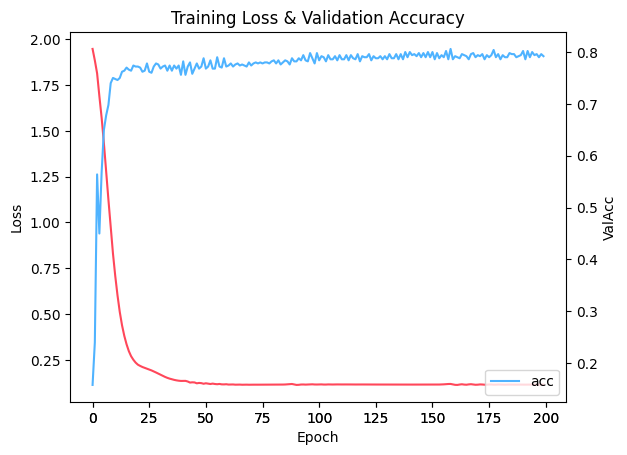

In [66]:
plot_loss_with_acc(loss, val_acc)

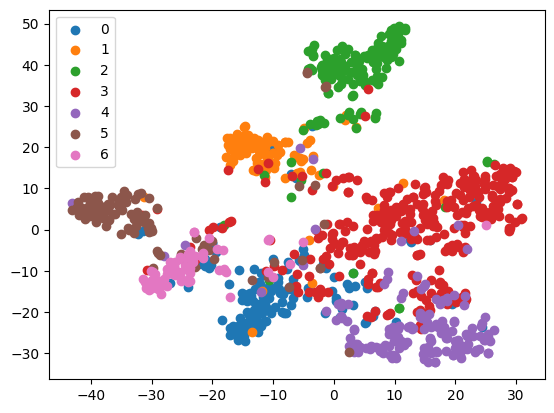

In [67]:
# 绘制测试数据的TSNE降维图
from sklearn.manifold import TSNE
tsne = TSNE()
out = tsne.fit_transform(test_logits)
fig = plt.figure()
for i in range(7):
    indices = test_label == i
    x, y = out[indices].T
    plt.scatter(x, y, label=str(i))
plt.legend()